# Project 2 #

Max Welsch 1265942
Hanshi Tang 1266337


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# read the csvs
test_dataset = pd.read_csv('test_dataset.csv')
train_dataset = pd.read_csv('train_dataset.csv')

train_X = train_dataset.drop(columns=['imdb_score_binned'])
train_y = train_dataset['imdb_score_binned']

In [4]:
train_dataset.head()
train_dataset.shape

(3004, 27)

Visualise the data - here we can see actually a zero R model will perform okay lol.

(array([  24.,    0.,  235.,    0.,    0., 1839.,    0.,  777.,    0.,
         129.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

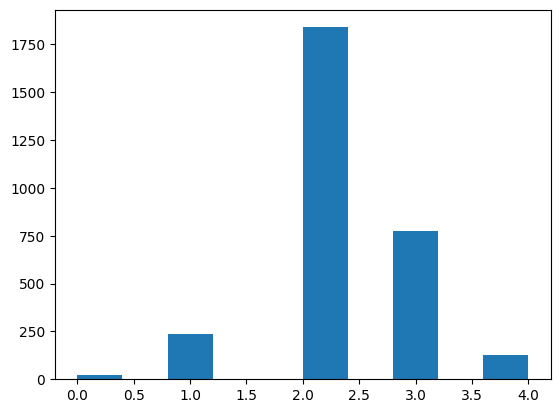

In [5]:
plt.hist(train_dataset['imdb_score_binned'])

# MODEL 1  ZERO R #
This will just be a zero R model. Based on the histogram it SHOULD perform okay

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

zero_r_classifier = DummyClassifier(strategy='most_frequent')

scores = cross_val_score(zero_r_classifier, train_X, train_y, cv=5)
print(f"Scores for Zero R: {scores}")
print(f"Average score: {np.mean(scores)}")

Scores for Zero R: [0.61231281 0.61231281 0.61231281 0.61064892 0.61333333]
Average score: 0.6121841375485302


Now fit it to the training data

In [7]:
zero_r_classifier.fit(train_X, train_y)

DummyClassifier(strategy='most_frequent')

In [8]:
predictions = zero_r_classifier.predict(test_dataset)

In [22]:
zero_r_predictions = pd.DataFrame(predictions, columns=['imdb_score_binned'])
zero_r_predictions.index = pd.RangeIndex(start=1, stop=len(predictions)+ 1, step=1)
zero_r_predictions.to_csv('zero_r_predictions.csv', index=True, index_label='id')

In [23]:
zero_r_predictions

,imdb_score_binned
1,2
2,2
3,2
4,2
5,2
...,...
748,2
749,2
750,2
751,2


# TO IMPLEMENT: #

A random forest method

A logistic regression

Naive Bayes

SVM (with PCA dimensionality reduction)



In [24]:
train_dataset.head()

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned
0,1,Roger Allers,186,73,28,847,Nathan Lane,2000,422783777,Adventure|Animation|Drama|Family|Musical,...,656,English,USA,G,1994,886,17000,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,4
1,2,George A. Romero,252,97,0,233,Shawn Roberts,654,20433940,Horror,...,662,English,Canada,R,2005,529,0,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,2
2,3,David Gordon Green,232,117,234,221,Tye Sheridan,12000,371897,Drama,...,118,English,USA,R,2013,1000,11000,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,2
3,4,John Carpenter,297,109,0,145,Richard Masur,957,13782838,Horror|Mystery|Sci-Fi,...,911,English,USA,R,1982,163,23000,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,4
4,5,Peter Jackson,297,171,0,857,Orlando Bloom,16000,313837577,Action|Adventure|Drama|Fantasy,...,5060,English,New Zealand,PG-13,2001,5000,21000,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,4
